27.478050549563925
轮数：1，平均损失值：1037.094482421875
轮数：2，平均损失值：856.7438201904297
轮数：3，平均损失值：781.5419558570499
轮数：4，平均损失值：686.1862891060965
轮数：5，平均损失值：617.3052577427455
轮数：6，平均损失值：561.3971261524018
轮数：7，平均损失值：512.7951565178073
轮数：8，平均损失值：473.03826590946744
轮数：9，平均损失值：444.68697563050284
轮数：10，平均损失值：413.4155720302037
轮数：11，平均损失值：387.89233730365703
轮数：12，平均损失值：364.46869673047746
轮数：13，平均损失值：344.1954341091953
轮数：14，平均损失值：326.1981837214256
轮数：15，平均损失值：310.93585008893695
轮数：16，平均损失值：297.1803915500641
轮数：17，平均损失值：285.84623325572295
轮数：18，平均损失值：274.377334186009
轮数：19，平均损失值：264.3626571741319
轮数：20，平均损失值：255.22751915795462
轮数：21，平均损失值：246.65762283039743
轮数：22，平均损失值：239.33849456712798
轮数：23，平均损失值：232.3808499981898
轮数：24，平均损失值：226.00246053082603
轮数：25，平均损失值：220.01771154676166
轮数：26，平均损失值：214.750812797756
轮数：27，平均损失值：209.6013339461473
轮数：28，平均损失值：204.80166883371314
轮数：29，平均损失值：200.30904516680488
轮数：30，平均损失值：196.437474436987
轮数：31，平均损失值：192.66581829352313
轮数：32，平均损失值：189.0244885129588
轮数：33，平均损失值：185.578

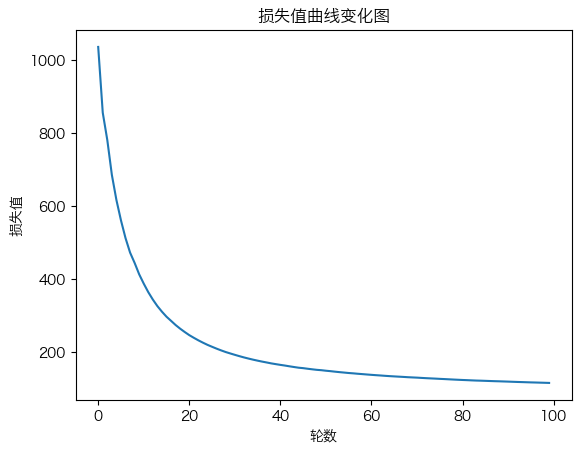

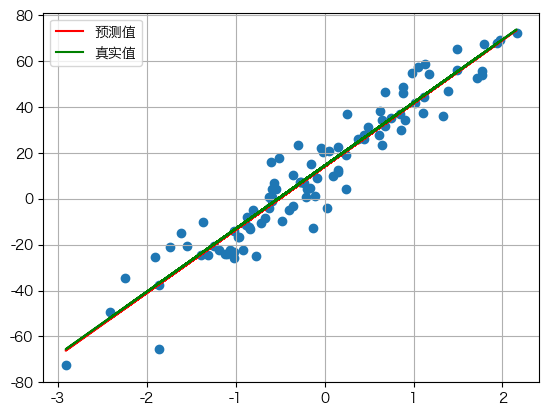

In [9]:
from random import shuffle
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader  # 数据加载器
from torch import nn  # 神经网络模块，nn模块中有平方损失函数和假设函数
from torch import optim  # 优化器模块，optim模块中有随机梯度下降优化器
from sklearn.datasets import make_regression  # 生成回归样本数据
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = [
    "PingFang SC",  # macOS 默认中文字体
    "Hiragino Sans GB",  # 常见中文字体
    "Songti SC",
    "Arial Unicode MS",  # 广覆盖的 Unicode 字体
    "Noto Sans CJK SC",  # 若已安装
    "DejaVu Sans",
]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号

"""
numpy对象 => 张量Tensor => 数据集Dataset => 数据加载器DataLoader
"""


# 1.定义函数，创建线性回归样本数据
def create_dataset():
    x, y, coef = make_regression(
        n_samples=100,  # 100条样本
        n_features=1,  # 1个特征
        noise=10,  # 噪声，噪声越大，样本点约散，噪声越小，样本点越集中
        bias=14.5,  # 偏置，默认值为0，设为14.5
        random_state=3,  # 随机种子
        coef=True,  # 是否返回系数，默认为False，返回值为None
    )

    # 2. 把上述的数据集封装成tensor对象
    x = torch.tensor(x, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    """
    x.shape = (100, 1) 100个样本数据
    y.shape = (100,)
    """
    # y = wx + b
    # coef为初始化权重w = 27.478050549563925 ， b=14.5
    # print(x)
    # print(type(x))
    # print(y)
    print(coef)
    # 3. 返回结果
    return x, y, coef


# 2.定义函数，表示模型训练
def train(x, y, coef):
    # 2.1 创建数据集对象，把tensor -> 数据集对象 -> 数据加载器
    dataset = TensorDataset(x, y)
    # 2.2 创建数据加载器，参1：数据集对象，参2：批量大小，参3：是否随机打乱数据
    # 为什么要随机打乱（训练集打乱，测试集不打乱）：因为下面会进行100次epoch，每次epoch都要随机打乱数据，不然每次epoch都是一样的数据
    dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
    # 2.3 创建初始的线性回归模型
    # 参1：输入特征维度，参2：输出特征维度
    """
    假设
    x = [[x1, x2, x3],
     [x4, x5, x6]]
     x1, x2, x3 是 3 个特征，每个样本有 3 个特征值，所以输入特征维度为 3
    """
    model = nn.Linear(in_features=1, out_features=1)

    # 2.4创建损失函数
    criterion = nn.MSELoss()  # 均方损失

    # 2.5创建优化器对象
    # 参1：模型参数，参2：学习率
    optimizer = optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降优化器

    # 2.6 具体训练过程
    # 定义变量
    epochs, loss_list, total_loss, total_sample = 100, [], 0.0, 0
    # 开始训练，按轮训练
    for epoch in range(epochs):  # epochs的值0，1，2...99
        # 每轮分批次训练，所以从数据夹在其中获取批次数据
        for train_x, train_y in dataloader:  # 7批（16, 16, 16, 16, 16, 16, 4）
            # 模型预测，正向传播
            y_pred = model(train_x)
            # 计算(每批的)损失
            loss = criterion(y_pred, train_y.reshape(-1, 1))  # train_y转成n*1的列向量
            # 计算总损失和样本批数
            total_loss += loss.item()
            total_sample += 1
            # 梯度清零 + 反向传播 + 梯度更新
            optimizer.zero_grad()
            loss.backward()  # 反向传播
            optimizer.step()  # 梯度更新

        # 把本轮的平均损失值，添加到列表中
        loss_list.append(total_loss / total_sample)
        print(f"轮数：{epoch + 1}，平均损失值：{total_loss / total_sample}")

    print(f"{epochs}轮的平均损失分别为：{loss_list}")
    print(f"模型参数，权重：{model.weight}，偏置：{model.bias}")

    # 绘制损失曲线
    plt.plot(range(epochs), loss_list)
    plt.xlabel("轮数")
    plt.ylabel("损失值")
    plt.title("损失值曲线变化图")
    plt.show()

    # 绘制预测值和真实值的关系
    # 绘制样本点分布情况
    plt.scatter(x, y)
    # 训练模型预测值
    y_pred = torch.tensor(data=[v * model.weight + model.bias for v in x])
    # 计算真实值
    y_true = torch.tensor(data=[v * coef + 14.5 for v in x])
    # 绘制预测值和真实值的折线图
    plt.plot(x, y_pred, color="red", label="预测值")
    plt.plot(x, y_true, color="green", label="真实值")
    plt.legend()  # 添加图例
    plt.grid()  # 添加网格
    plt.show()
    # 参1：数据加载器，参2：损失函数，参3：优化器
    # for epoch in range(100):  # 100次迭代
    #     for batch_x, batch_y in dataloader:  # 每次迭代，取一个批量数据
    #         # 2.6.1 正向传播
    #         y_pred = model(batch_x)  # 模型预测值
    #         loss = criterion(y_pred, batch_y.unsqueeze(1))  # 计算损失，参1：模型预测值，参2：真实值
    #         # 2.6.2 反向传播
    #         optimizer.zero_grad()  # 梯度清零，默认梯度会累加，需要清零
    #         loss.backward()  # 计算梯度
    #         optimizer.step()  # 更新参数
    #     # 2.6.3 打印损失
    #     print(f"第{epoch+1}次迭代，损失为：{loss.item()}")


if __name__ == "__main__":
    # 3.1创建数据集
    x, y, coef = create_dataset()
    train(x, y, coef)